In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
import ds_functions as ds


 ORAL_reduced30_extraTreeClassifier


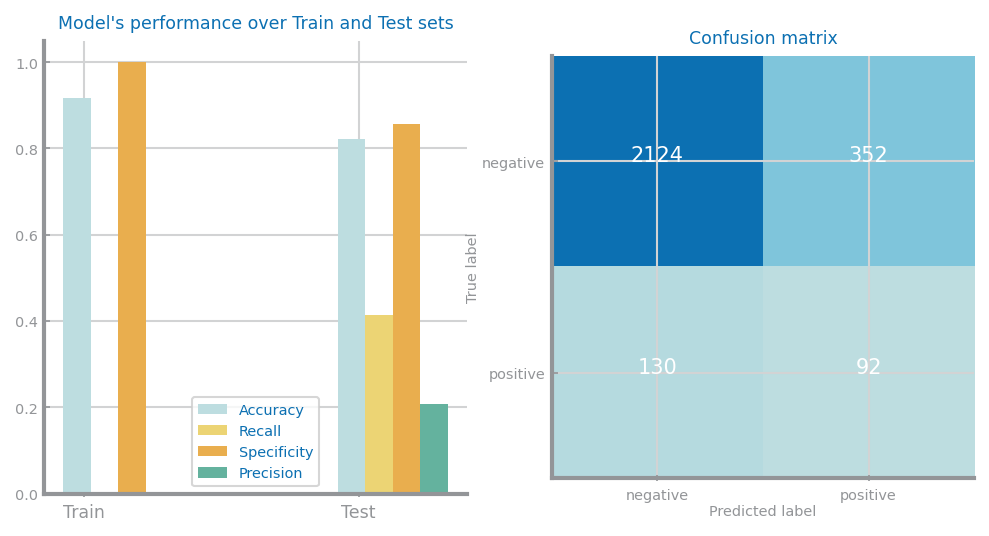

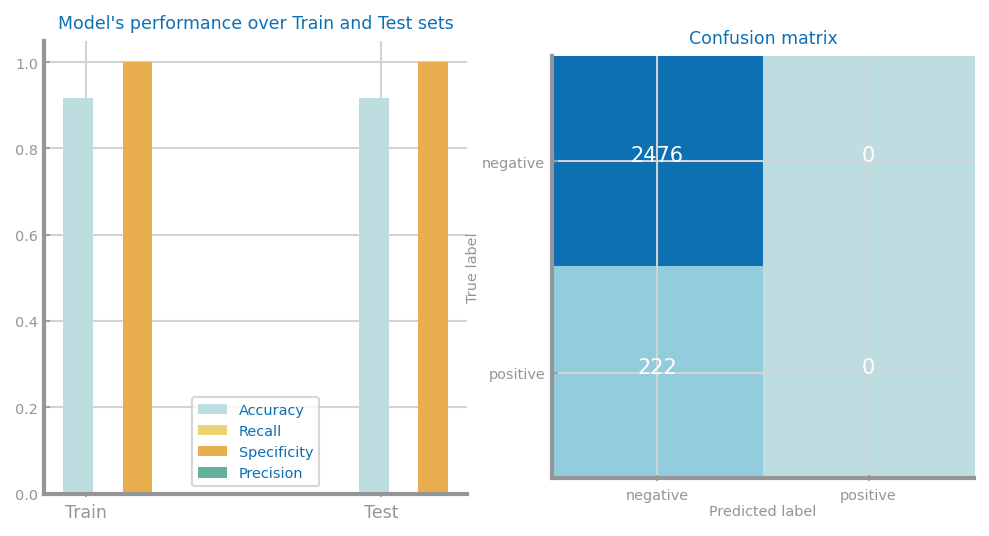

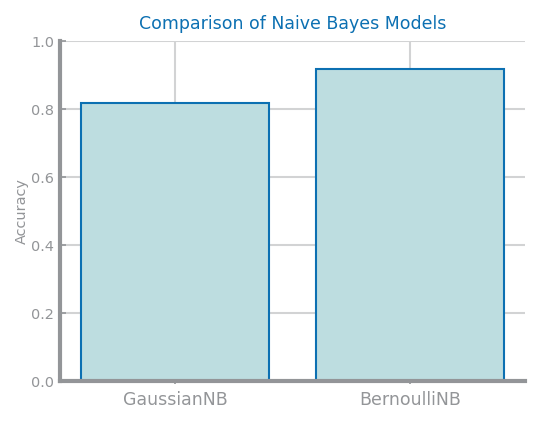


 ORAL_reduced32_chi


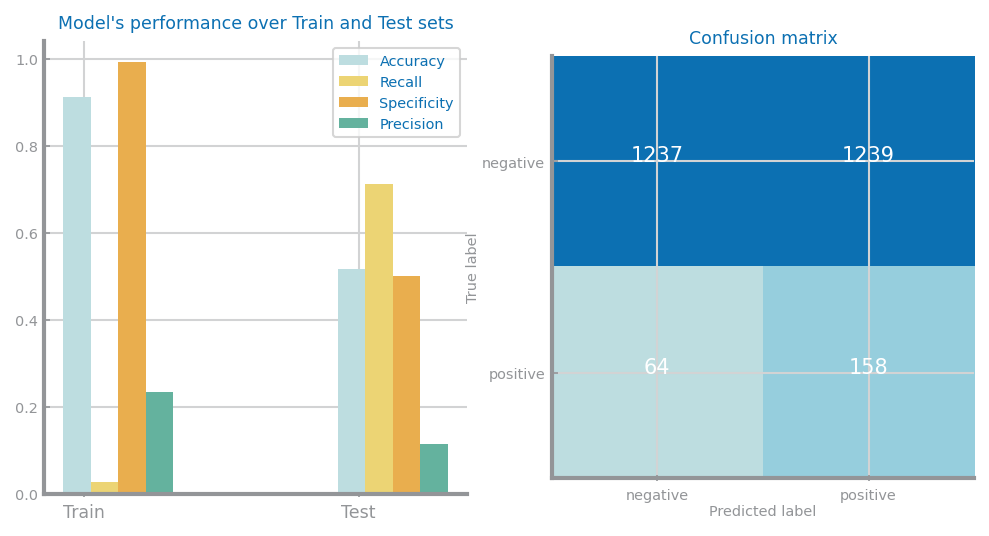

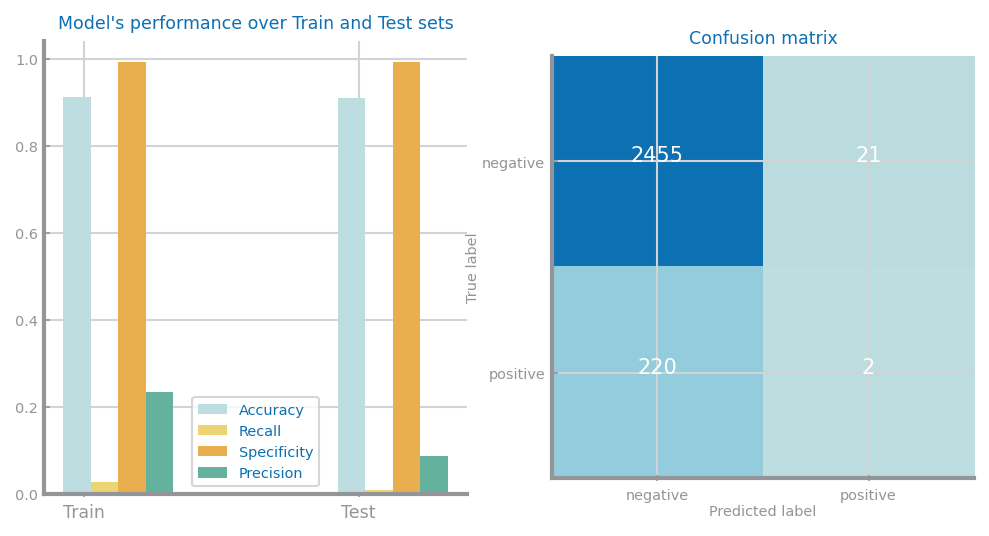

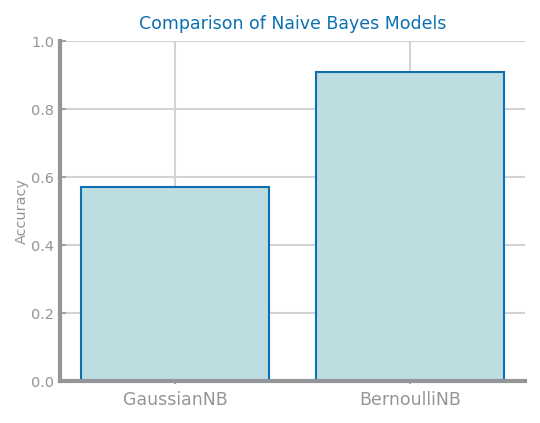


 ORAL_reduced32_mutual


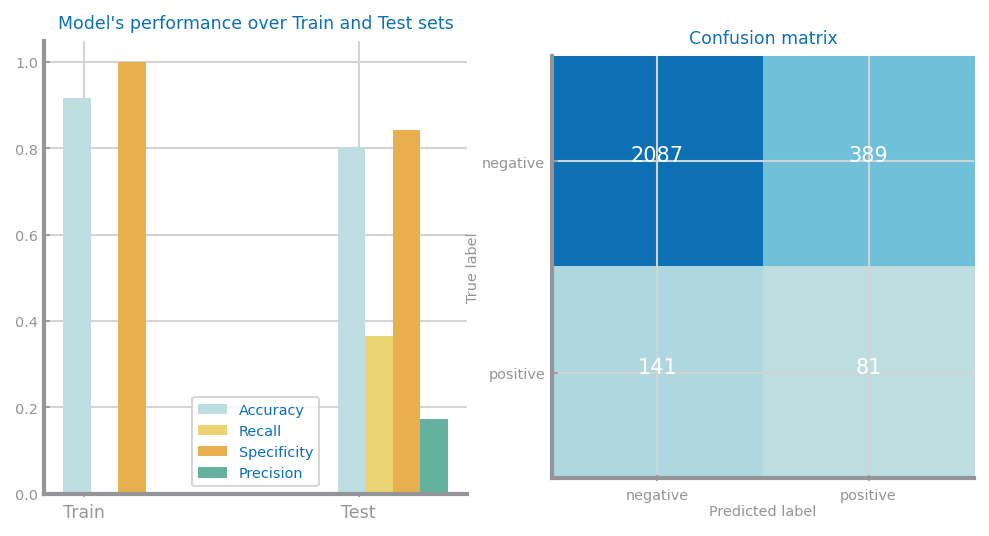

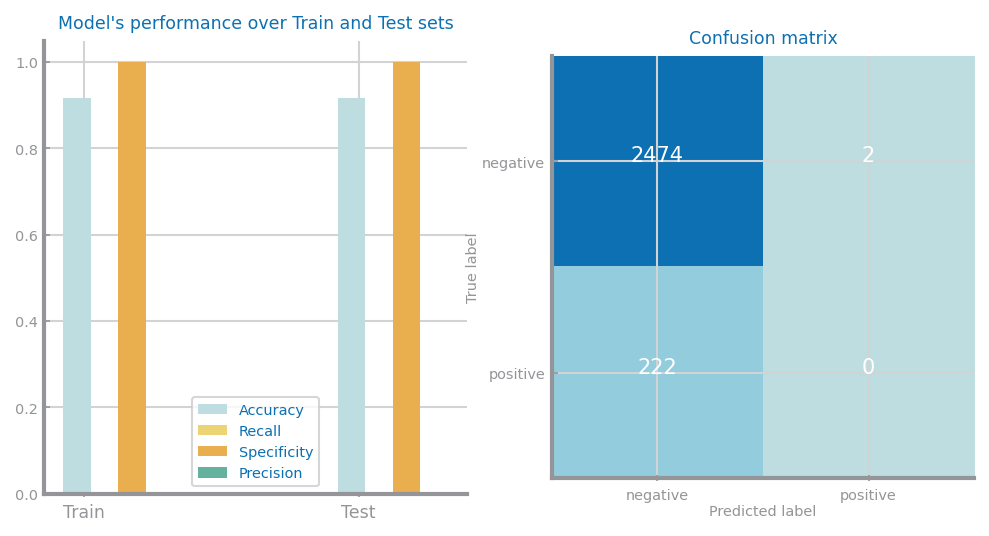

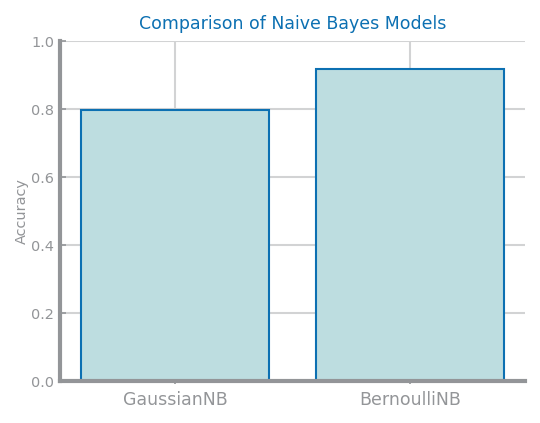


 ORAL_S_FChi_B_reduced32


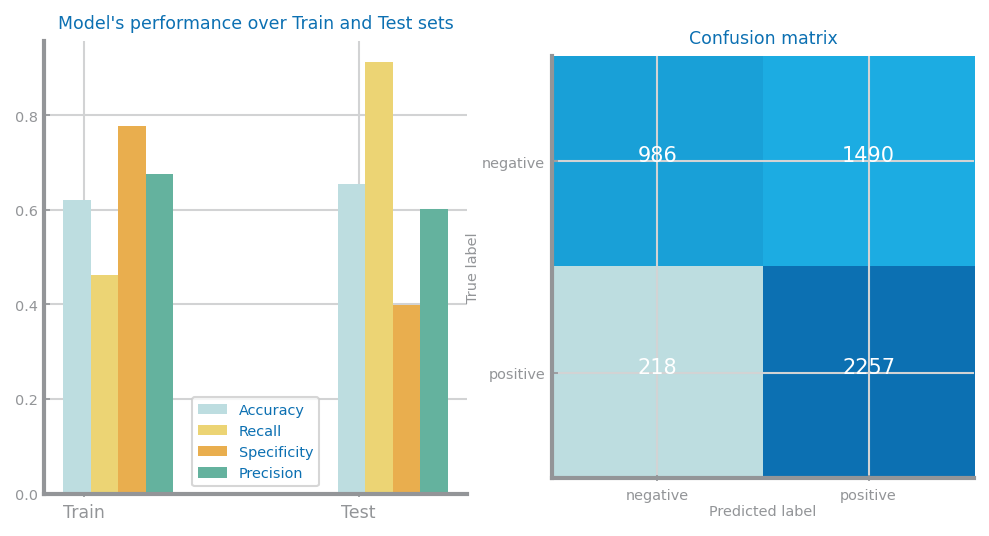

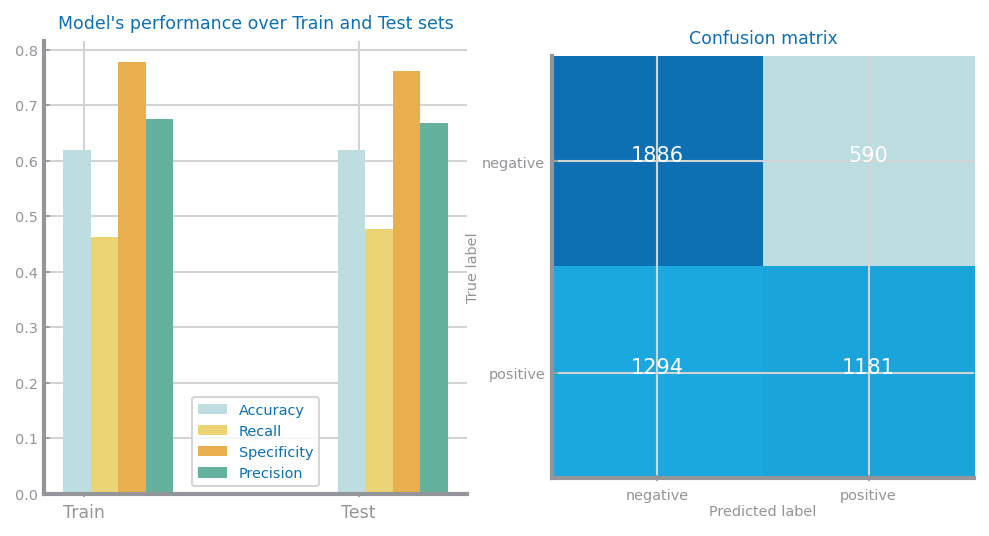

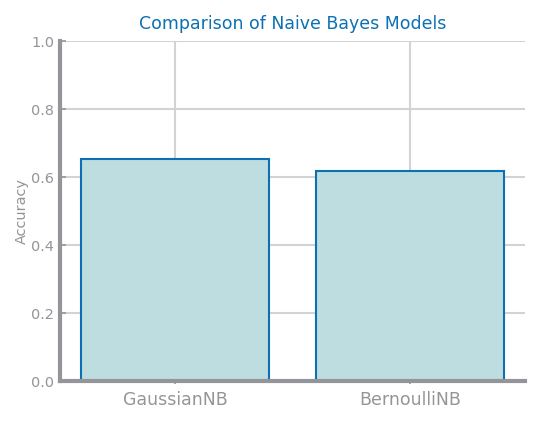


 ORAL_S_FImp_B_reduced30


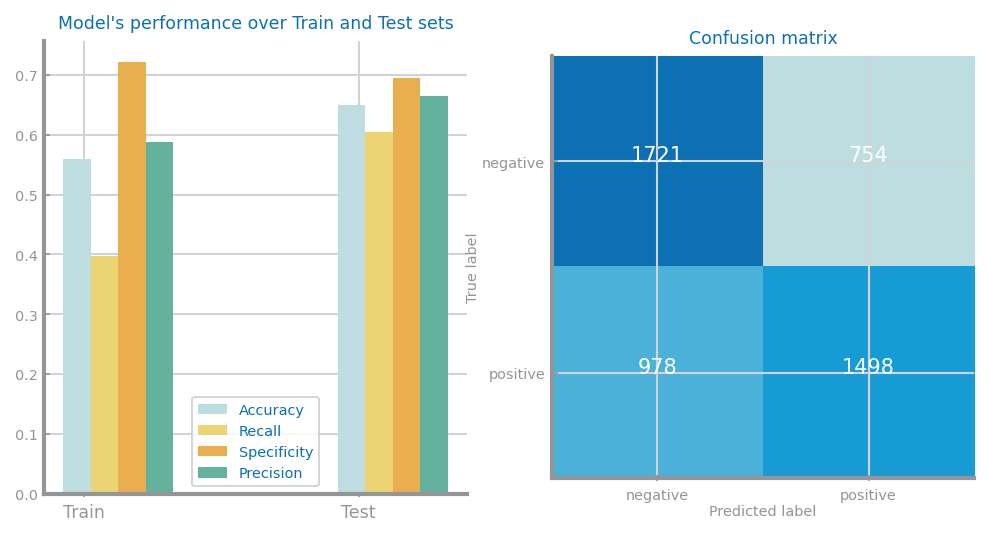

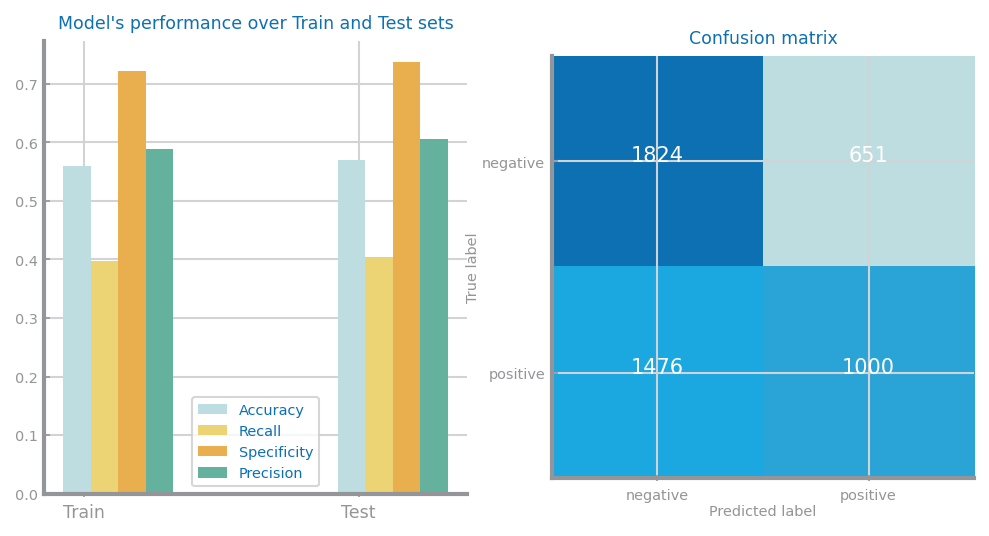

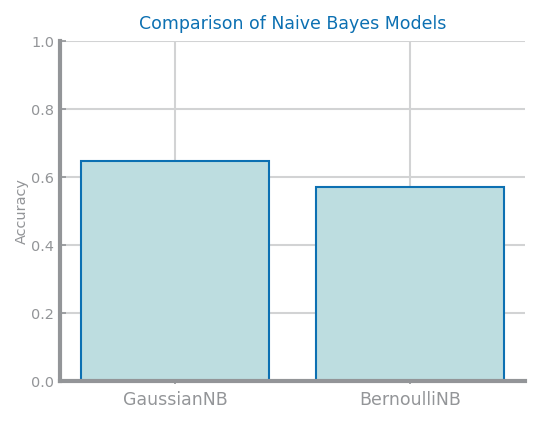


 ORAL_S_FMutual_B_reduced32


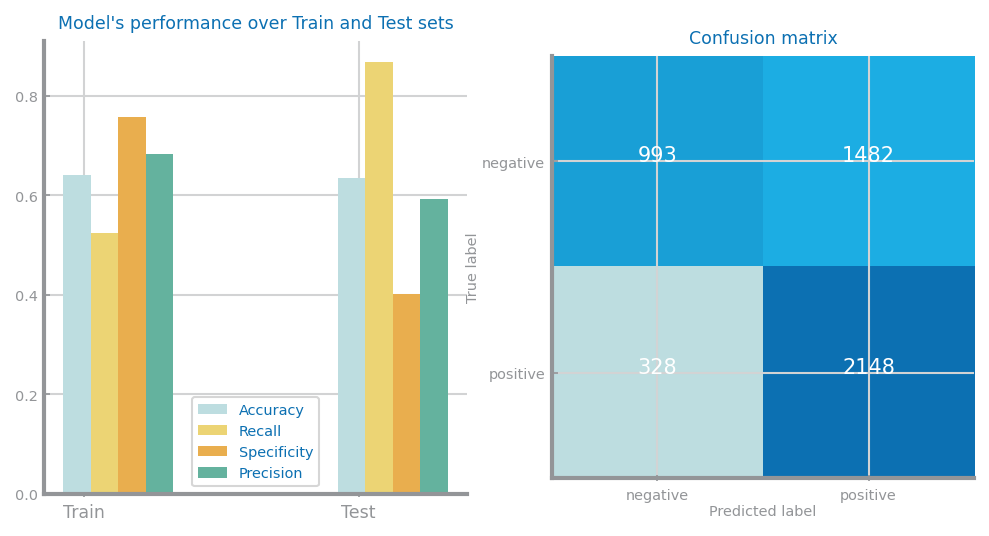

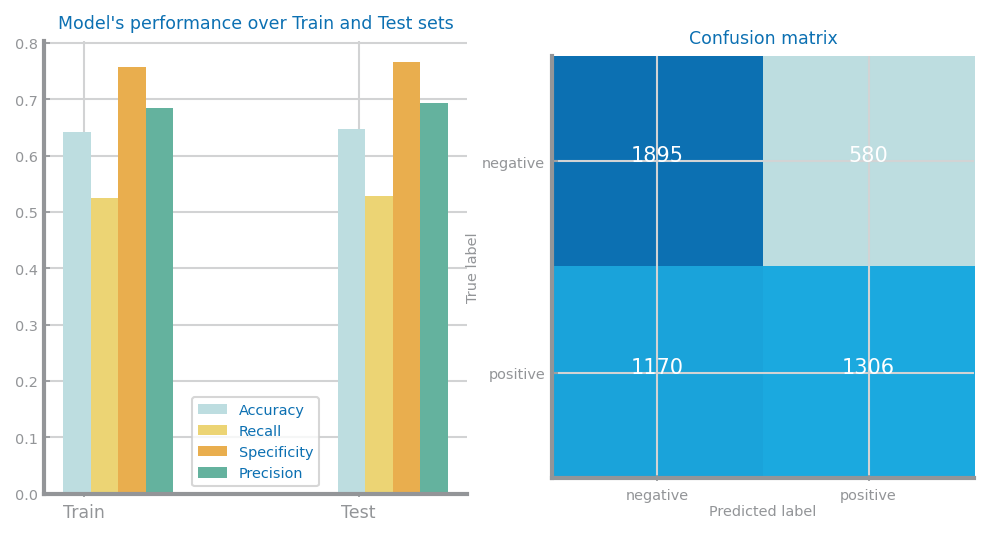

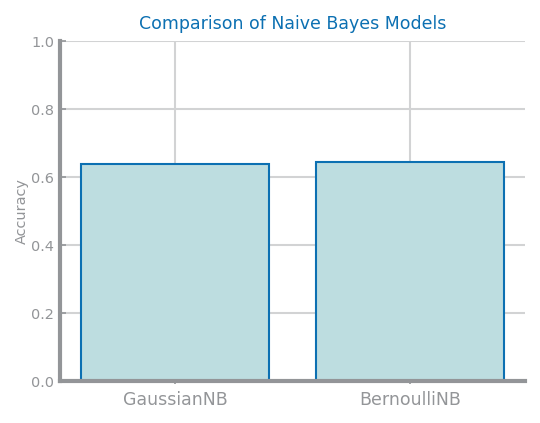

In [2]:
import os

directory = '../../datasets/TO_TEST/ORAL/reduced'

overall_accs = []
datasets = []

n_holdouts = 500

nvalues = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]
dist = ['manhattan', 'euclidean', 'chebyshev']
    
for filename in os.listdir(directory):
    if filename.endswith(".csv"): 
        path = directory + '/' + filename
        print('\n', filename.split('.')[0])
        data: pd.DataFrame = pd.read_csv(path, sep=';', header=None)    
        y: np.ndarray = data.pop(data.shape[1] - 1).values # Target Variable
        X: np.ndarray = data.values # Values of each feature on each record
        labels = pd.unique(y)
    
        train_size = 0.7 # % of records used for train (the remainder will be left for test)
        
        gaussian_acc = 0
        bernoulli_acc = 0
        
        for h in range(n_holdouts):

            trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=train_size, stratify=y)

            clf = GaussianNB()
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst_g = clf.predict(tstX)
            
            
            gaussian_acc += metrics.accuracy_score(tstY, prd_tst_g)
            
            clf = BernoulliNB()
            clf.fit(trnX, trnY)
            prd_trn = clf.predict(trnX)
            prd_tst = clf.predict(tstX)
            
            
            bernoulli_acc += metrics.accuracy_score(tstY, prd_tst)
            
        ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst_g)
        ds.plot_evaluation_results(labels, trnY, prd_trn, tstY, prd_tst)
            
        
        gaussian_acc /= n_holdouts
        bernoulli_acc /= n_holdouts
        
        plt.figure()
        ds.bar_chart(['GaussianNB', 'BernoulliNB'],[gaussian_acc, bernoulli_acc], title='Comparison of Naive Bayes Models', ylabel='Accuracy', percentage=True)
        plt.show()
        
        
        overall_accs += [max(gaussian_acc, bernoulli_acc)]
        # Dataset name
        datasets += [filename.split('.')[0]]

0    0.917607
1    0.917295
2    0.909759
3    0.653330
4    0.646893
5    0.642577
dtype: float64


[Text(0, 0, 'ORAL_reduced30_extraTreeClassifier'),
 Text(0, 0, 'ORAL_reduced32_mutual'),
 Text(0, 0, 'ORAL_reduced32_chi'),
 Text(0, 0, 'ORAL_S_FChi_B_reduced32'),
 Text(0, 0, 'ORAL_S_FImp_B_reduced30'),
 Text(0, 0, 'ORAL_S_FMutual_B_reduced32')]

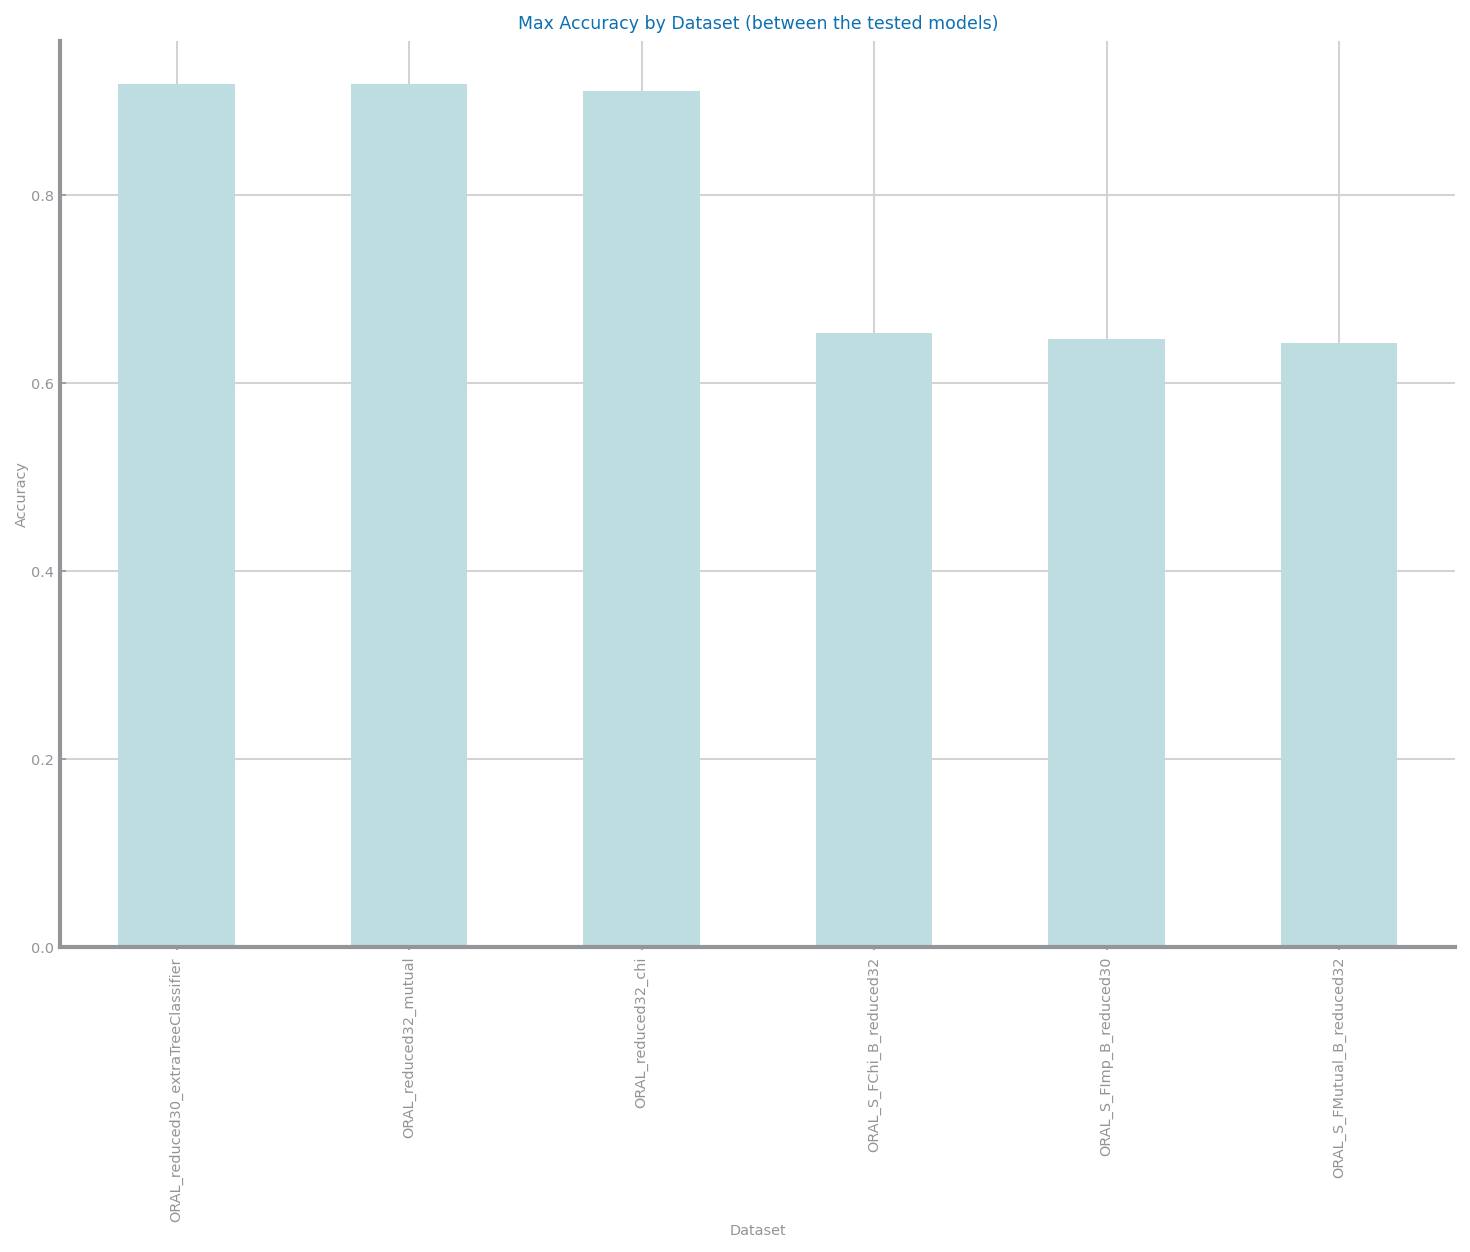

In [3]:
accs = pd.Series(overall_accs)
datasets = list(datasets)

res = {datasets[i]: overall_accs[i] for i in range(len(datasets))}

res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}

accs = pd.Series(list(res.values()))

print(accs)

datasets = list(res.keys())
# Plot the figure.
plt.figure(figsize=(12, 8))
ax = accs.plot(kind='bar')
ax.set_title('Max Accuracy by Dataset (between the tested models)')
ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_xticklabels(datasets)